# Income Dataset

## Prep data

In [1]:
import pandas
# this library contains a bunch of datasets & allows you to import them in python!
# this specific dataset isn't available in csv format so this is the best way to get that data
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
import seaborn as sns
import random

In [2]:
# get the actual data
fetchedData = fetch_ucirepo(id=2)
# get pandas dataframes from that data
X = fetchedData.data.features.copy()
Y = fetchedData.data.targets.copy()

# Some of the income values are formatted differently than others
Y['income'] = Y['income'].map({'<=50K.': '<=50K', '>50K.': '>50K', '<=50K': '<=50K', '>50K': '>50K'})

# This makes it easier to use the integer-form education and hours-per-week columns later.
X = X.rename(columns={'education-num': 'educationNum', 'hours-per-week': 'hoursPerWeek'})

We'll look at the distribution of income categories before further preparing the data.

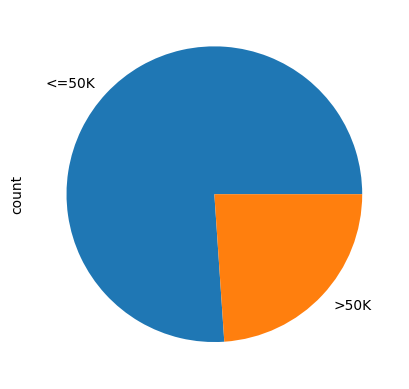

In [3]:
plot = Y['income'].value_counts().plot.pie()

In [4]:
Y['income'] = Y['income'].map({ '<=50K': 0, '>50K': 1 })

# create a combined dataframe so we can access both at once
all = pandas.concat([X, Y], axis=1)

We're going to look at a couple more visualizations of our most interesting features before we standardize them.

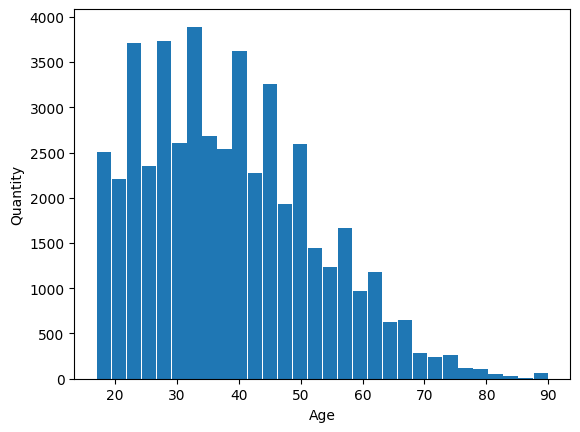

In [5]:
plt.hist(all.age, bins=30, rwidth=0.95)
plt.xlabel('Age')
plt.ylabel('Quantity')
plt.show()

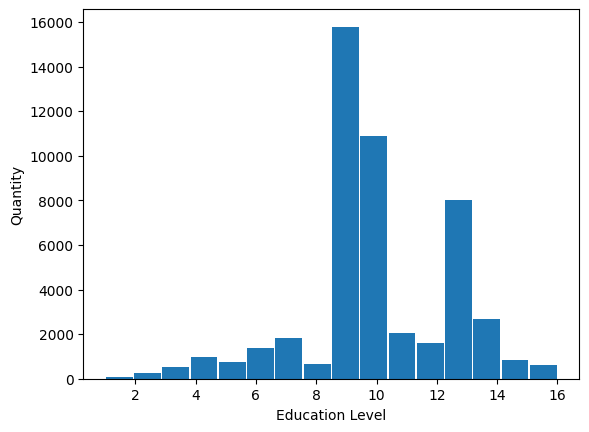

In [6]:
plt.hist(all.educationNum, bins=16, rwidth=0.95)
plt.xlabel('Education Level')
plt.ylabel('Quantity')
plt.show()
# 9: HS grad
# 10: some college
# 13: bachelor's degree

In [7]:
# Standardize some inputs
X.age = (X.age - X.age.mean()) / X.age.std()
X.educationNum = (X.educationNum - X.educationNum.mean()) / X.educationNum.std()
X.hoursPerWeek = (X.hoursPerWeek - X.hoursPerWeek.mean()) / X.hoursPerWeek.std()

## Logistic Regression

We tried several combinations of the variables we thought would be the most predictive.

In [8]:
lm = LogisticRegression()
Xmodel = X[['age', 'educationNum']]
Ymodel = Y.income
lm.fit(Xmodel, Ymodel)

y_pred = lm.predict(Xmodel)

display(y_pred)
display('predicted range: [{0:.2f},{1:.2f}]'.format(min(y_pred), max(y_pred)))

p,r,f,s = precision_recall_fscore_support(Ymodel, y_pred, labels=[0,1])
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

array([0, 1, 0, ..., 0, 0, 0])

'predicted range: [0.00,1.00]'

'precision = [0.60614793 0.80447785]'

'recall = [0.26995807 0.94482573]'

'f-score = [0.37354961 0.86902169]'

In [9]:
lm = LogisticRegression()
Xmodel = X[['age', 'hoursPerWeek']]
Ymodel = Y.income
lm.fit(Xmodel, Ymodel)

y_pred = lm.predict(Xmodel)

display(y_pred)
display('predicted range: [{0:.2f},{1:.2f}]'.format(min(y_pred), max(y_pred)))

p,r,f,s = precision_recall_fscore_support(Ymodel, y_pred, labels=[0,1])
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

array([0, 0, 0, ..., 0, 0, 0])

'predicted range: [0.00,1.00]'

'precision = [0.4390142  0.77101275]'

'recall = [0.08992898 0.96385412]'

'f-score = [0.14927917 0.85671567]'

In [10]:
lm = LogisticRegression()
Xmodel = X[['educationNum', 'hoursPerWeek']]
Ymodel = Y.income
lm.fit(Xmodel, Ymodel)

y_pred = lm.predict(Xmodel)

display(y_pred)
display('predicted range: [{0:.2f},{1:.2f}]'.format(min(y_pred), max(y_pred)))

p,r,f,s = precision_recall_fscore_support(Ymodel, y_pred, labels=[0,1])
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

array([0, 0, 0, ..., 0, 0, 1])

'predicted range: [0.00,1.00]'

'precision = [0.63247214 0.79529559]'

'recall = [0.2136562  0.96094738]'

'f-score = [0.31941158 0.87030921]'

In [25]:
lm = LogisticRegression()
Xmodel = X[['age', 'educationNum', 'hoursPerWeek']]
Ymodel = Y.income
lm.fit(Xmodel, Ymodel)

y_pred = lm.predict(Xmodel)

display(y_pred)
display('predicted range: [{0:.2f},{1:.2f}]'.format(min(y_pred), max(y_pred)))

p,r,f,s = precision_recall_fscore_support(Ymodel, y_pred, labels=[0,1])
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

array([0, 0, 0, ..., 0, 0, 1])

'predicted range: [0.00,1.00]'

'precision = [0.8137683  0.61671374]'

'recall = [0.93790876 0.31761787]'

'f-score = [0.87143965 0.4192929 ]'

Text(0, 0.5, 'Education')

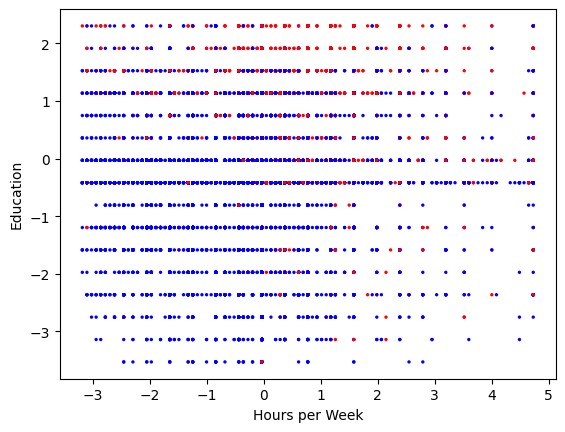

In [12]:
color = ['b' if y_ == 0 else 'r' for y_ in Ymodel]
plt.scatter(Xmodel.hoursPerWeek, Xmodel.educationNum, c=color, s=2)
plt.xlabel('Hours per Week')
plt.ylabel('Education')

Text(0, 0.5, 'Education')

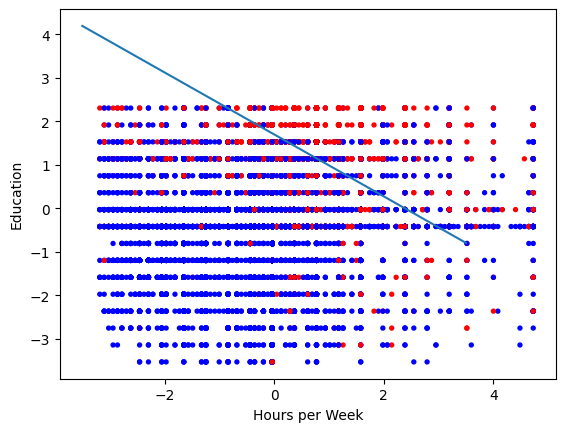

In [13]:
plt.scatter(Xmodel.hoursPerWeek, Xmodel.educationNum, c=color, s=8)
b0 = lm.intercept_[0]
b=lm.coef_[0]

Xdb = [-3.5, 3.5]
ydb = [-(b0+b[0]*x)/b[1] for x in Xdb]

plt.plot(Xdb, ydb)
plt.xlabel('Hours per Week')
plt.ylabel('Education')

Text(0.5, 0, 'Age')

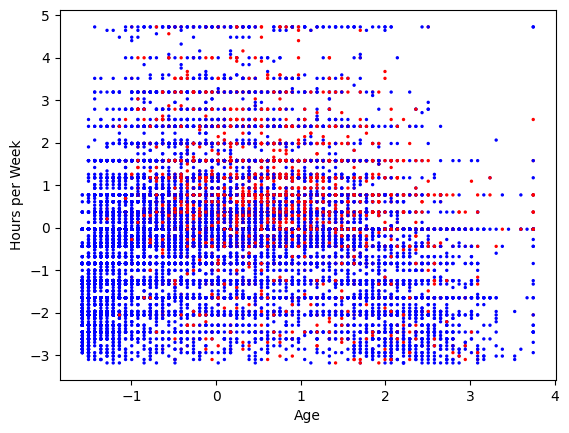

In [14]:
plt.scatter(Xmodel.age, Xmodel.hoursPerWeek, c=color, s=2)
plt.ylabel('Hours per Week')
plt.xlabel('Age')

## Support Vector Machines

In [26]:
Xmodel = X[['age', 'educationNum']]
Ymodel = Y.income


newlabel = []
color = ['r' if y_ == 0 else 'b' for y_ in newlabel]

### Linear Model

In [27]:
clf = svm.SVC(kernel='linear', class_weight={0:1,1:2})
clf.fit(Xmodel.values, Ymodel)

y_pred = clf.predict(Xmodel)

p,r,f,s = precision_recall_fscore_support(Ymodel, y_pred, labels=[0,1])
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))
display('support = {}'.format(s))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


'precision = [0.8471314  0.46166228]'

'recall = [0.80196474 0.53991615]'

'f-score = [0.82392954 0.4977322 ]'

'support = [37155 11687]'

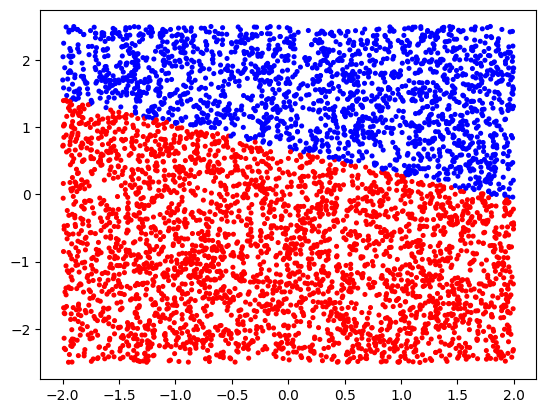

In [22]:
newx = []
newy = []
for _ in range(5000):
    px = random.uniform(-2,2)
    py = random.uniform(-2.5,2.5)
    plabel = clf.predict([[px,py]])
    newx.append(px)
    newy.append(py)
    newlabel.append(plabel)

plt.scatter(newx, newy, c=color, marker='o', s=7)

### Polynomial Model

In [29]:
clf = svm.SVC(kernel='poly', class_weight={0:1,1:2}, degree=2)
clf.fit(Xmodel.values, Ymodel)

y_pred = clf.predict(Xmodel)

p,r,f,s = precision_recall_fscore_support(Ymodel, y_pred, labels=[0,1])
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))
display('support = {}'.format(s))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [ ]:
newx = []
newy = []
for _ in range(5000):
    px = random.uniform(-2,2)
    py = random.uniform(-2.5,2.5)
    plabel = clf.predict([[px,py]])
    newx.append(px)
    newy.append(py)
    newlabel.append(plabel)

plt.scatter(newx, newy, c=color, marker='o', s=7)

In [ ]:
clf = svm.SVC(kernel='poly', class_weight={0:1,1:2}, degree=3)
clf.fit(Xmodel.values, Ymodel)

y_pred = clf.predict(Xmodel)

p,r,f,s = precision_recall_fscore_support(Ymodel, y_pred, labels=[0,1])
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))
display('support = {}'.format(s))